# Example usage of `postMerger.qnm_Kerr`

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import postMerger as pM

## Read documentation

In [4]:
help(pM.qnm_Kerr)

Help on function qnm_Kerr in module postMerger._utils:

qnm_Kerr(mass, spin, mode, prograde=1, qnm_method='interp', SI_units=False)
    Returns the frequency and the damping time of a Kerr black hole.
    
    Parameters
    ----------
    mass : float or array-like
        Mass of the Kerr black hole.
    
    spin : float or array-like
        Dimensionless spin of the Kerr black hole.
    
    mode : tuple
        A tuple (l,m,n) with the indices labeling the mode.
    
    prograde : int. Default=1.
        Allowed options: [-1,1]. If 1, returns prograde modes. If -1, returns retrograde modes. 
        The conventions for prograde-vs-retrograde follow https://arxiv.org/abs/2310.04489 .
    
    qnm_method : str. Default='interp'.
        The method used to approximate the Kerr spectrum. Allowed options: ['interp','L18'].
        
        If 'interp', interpolates linearly the numerical data from https://arxiv.org/abs/gr-qc/0512160 , using tables provided at https://pages.jh.edu/ebe

## Evaluate QNMs

In [5]:
## mass and spin
mass = 67
spin = 0.67

## mode
mode = (2,2,0)

## evaluate with default qnm_method='interp'
f, tau = pM.qnm_Kerr(mass,spin,mode,SI_units=True)

## results
print('frequency (Hz): ',f)
print('damping time (s): ',tau)

frequency (Hz):  250.71404280475124
damping time (s):  0.004032098030215414


In [6]:
## check with alternative 'L18' qnm_method
f, tau = pM.qnm_Kerr(mass,spin,mode,SI_units=True,qnm_method='L18')
print('frequency (Hz): ',f)
print('damping time (s): ',tau)

frequency (Hz):  250.78370869540043
damping time (s):  0.0040332925616675865


## Evaluate QNMs in batches

In [7]:
## mass is float but spin is a batch
## you can also set both batches of equal length
mass = 67
spin = np.linspace(-0.99,0.99,100)
mode = (2,2,0)
f, tau = pM.qnm_Kerr(mass,spin,mode,SI_units=True)

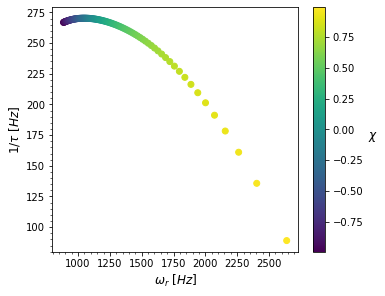

In [8]:
## show results
fig, axs = plt.subplots(1,1,figsize=(5.5,4.5))
t = axs.scatter(2*np.pi*f,1/tau,c=spin,vmin=-0.99,vmax=0.99)
cbar = plt.colorbar(mappable=t,ax=axs)
cbar.set_label(r'$\chi$',fontsize=12,rotation=0,labelpad=10)
axs.minorticks_on()
axs.set_xlabel(r'$\omega_r~[Hz]$',fontsize=12)
axs.set_ylabel(r'$1/\tau~[Hz]$',fontsize=12)
plt.show()

## Prograde-vs-retrograde modes

Our conventions for prograde-vs-retrograde modes follow Appendix A of https://arxiv.org/abs/2310.04489 .

Here, we reproduce Fig. 12 there for illustration.

In [9]:
mass = 1.
spin = np.linspace(-0.99,0.99,100)
mode = (2,2,0)

## evaluate prograde mode in natural unts (SI_units=False)
f_prograde, tau_prograde = pM.qnm_Kerr(mass,spin,mode,prograde=1,SI_units=False)

## same for retrograde mode
f_retrograde, tau_retrograde = pM.qnm_Kerr(mass,spin,mode,prograde=-1,SI_units=False)

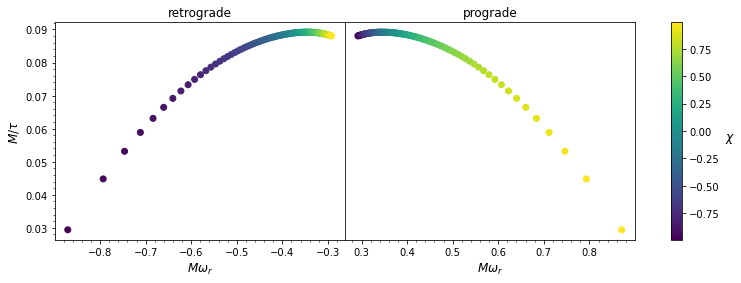

In [10]:
fig, axs = plt.subplots(1,2,figsize=(13,4),\
                        gridspec_kw={'wspace':0.})
t = axs[0].scatter(2*np.pi*f_retrograde,1/tau_retrograde,c=spin,vmin=-0.99,vmax=0.99)
axs[1].scatter(2*np.pi*f_prograde,1/tau_prograde,c=spin,vmin=-0.99,vmax=0.99)
cbar = plt.colorbar(mappable=t,ax=axs)
cbar.set_label(r'$\chi$',fontsize=12,rotation=0,labelpad=10)
axs[0].minorticks_on()
axs[1].minorticks_on()
axs[1].set_yticks([])
axs[0].set_xlabel(r'$M\omega_r$',fontsize=12)
axs[1].set_xlabel(r'$M\omega_r$',fontsize=12)
axs[0].set_ylabel(r'$M/\tau$',fontsize=12)
axs[0].set_title('retrograde',fontsize=12)
axs[1].set_title('prograde',fontsize=12)
plt.show()